In [386]:
import pandas as pd
import re
import datetime

In [348]:
df = pd.read_csv('ml_dataframe_fixed.csv')
df

,Unnamed: 0,category_id,category,total_items_in_category,best_seller_product,total_visits,price,currency,sold,creation_date,country,state,brand,average_product_rating,seller_id
0,0,MCU1747,Accesorios para Vehículos,0,not found,not found,not found,not found,not found,not found,Cuba,not found,not found,not found,not found
1,1,MCU1367,Arte y Antigüedades,0,not found,not found,not found,not found,not found,not found,Cuba,not found,not found,not found,not found
2,2,MCU1743,"Autos, Motos y Otros",0,not found,not found,not found,not found,not found,not found,Cuba,not found,not found,not found,not found
3,3,MCU1039,Cámaras Digitales y Foto,0,not found,not found,not found,not found,not found,not found,Cuba,not found,not found,not found,not found
4,4,MCU1051,Celulares y Teléfonos,0,not found,not found,not found,not found,not found,not found,Cuba,not found,not found,not found,not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,489,MLU1430,"Ropa, Calzados y Accesorios",217685,Remera Stranger Things Hellfire Club,{'MLU613075535': 7732},490,UYU,500,2022-05-31T16:33:57.000Z,Uruguay,Montevideo,Maldito Ramon,4.9,124773885
490,490,MLU409431,Salud y Equipamiento Médico,33460,Masajeador Electrico Like Cuerpo Espalda Cuell...,{'MLU473348752': 86157},939,UYU,250,2020-07-06T16:28:57.000Z,Uruguay,Montevideo,"Cervical,Pies,Todo el cuerpo,cuello,cervicales",4.6,97669372
491,491,MLU1540,Servicios,5223,not found,not found,not found,not found,not found,not found,Uruguay,not found,not found,not found,not found
492,492,MLU111079,"Souvenirs, Cotillón y Fiestas",57923,Máquina Inflador 600w 2iny + Pack X100 Globos ...,{'MLU452984708': 72690},990,UYU,500,2018-04-24T16:51:46.000Z,Uruguay,Montevideo,by El Rey,4.7,83198226


In [349]:
df = df.drop(['Unnamed: 0'], axis=1)

In [350]:
df = df.drop(['category_id'], axis=1)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   category                 494 non-null    object
 1   total_items_in_category  494 non-null    int64 
 2   best_seller_product      494 non-null    object
 3   total_visits             494 non-null    object
 4   price                    494 non-null    object
 5   currency                 494 non-null    object
 6   sold                     494 non-null    object
 7   creation_date            494 non-null    object
 8   country                  494 non-null    object
 9   state                    494 non-null    object
 10  brand                    481 non-null    object
 11  average_product_rating   494 non-null    object
 12  seller_id                494 non-null    object
dtypes: int64(1), object(12)
memory usage: 50.3+ KB


In [352]:
df.describe()

,total_items_in_category
count,4.940000e+02
mean,7.997342e+05
std,5.134654e+06
min,0.000000e+00
25%,1.475000e+02
50%,1.137300e+04
75%,2.989832e+05
max,1.040217e+08


In [353]:
def visits(x):
        if x != 'not found':
            nums = re.findall(r'-?\d+\.?\d*', x)
            views = nums[1]
            return views

In [354]:
df['total_visits'] = df['total_visits'].apply(visits)

In [355]:
df = df.fillna(0)

In [356]:
df['total_visits'] = df['total_visits'].astype('float64')

In [357]:
def to_numeric(column_name):
    column_name = column_name.replace('not found', '0')
    column_name = float(column_name)
    return column_name

In [358]:
df['price'] = df['price'].apply(to_numeric)
df['sold'] = df['sold'].apply(to_numeric)
df['average_product_rating'] = df['average_product_rating'].apply(to_numeric)

In [359]:
df.describe()

,total_items_in_category,total_visits,price,sold,average_product_rating
count,4.940000e+02,4.940000e+02,494.000000,494.000000,494.000000
mean,7.997342e+05,9.938029e+04,6410.549170,10409.714575,1.566194
std,5.134654e+06,6.226614e+05,27815.929125,56914.397112,2.189652
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.475000e+02,0.000000e+00,0.000000,0.000000,0.000000
50%,1.137300e+04,0.000000e+00,0.000000,0.000000,0.000000
75%,2.989832e+05,4.308000e+03,282.562500,500.000000,4.475000
max,1.040217e+08,1.158088e+07,303800.000000,794439.000000,5.000000


In [360]:
df

,category,total_items_in_category,best_seller_product,total_visits,price,currency,sold,creation_date,country,state,brand,average_product_rating,seller_id
0,Accesorios para Vehículos,0,not found,0.0,0.0,not found,0.0,not found,Cuba,not found,not found,0.0,not found
1,Arte y Antigüedades,0,not found,0.0,0.0,not found,0.0,not found,Cuba,not found,not found,0.0,not found
2,"Autos, Motos y Otros",0,not found,0.0,0.0,not found,0.0,not found,Cuba,not found,not found,0.0,not found
3,Cámaras Digitales y Foto,0,not found,0.0,0.0,not found,0.0,not found,Cuba,not found,not found,0.0,not found
4,Celulares y Teléfonos,0,not found,0.0,0.0,not found,0.0,not found,Cuba,not found,not found,0.0,not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,"Ropa, Calzados y Accesorios",217685,Remera Stranger Things Hellfire Club,7732.0,490.0,UYU,500.0,2022-05-31T16:33:57.000Z,Uruguay,Montevideo,Maldito Ramon,4.9,124773885
490,Salud y Equipamiento Médico,33460,Masajeador Electrico Like Cuerpo Espalda Cuell...,86157.0,939.0,UYU,250.0,2020-07-06T16:28:57.000Z,Uruguay,Montevideo,"Cervical,Pies,Todo el cuerpo,cuello,cervicales",4.6,97669372
491,Servicios,5223,not found,0.0,0.0,not found,0.0,not found,Uruguay,not found,not found,0.0,not found
492,"Souvenirs, Cotillón y Fiestas",57923,Máquina Inflador 600w 2iny + Pack X100 Globos ...,72690.0,990.0,UYU,500.0,2018-04-24T16:51:46.000Z,Uruguay,Montevideo,by El Rey,4.7,83198226


array([[<AxesSubplot:title={'center':'total_items_in_category'}>,
        <AxesSubplot:title={'center':'total_visits'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sold'}>],
       [<AxesSubplot:title={'center':'average_product_rating'}>,
        <AxesSubplot:>]], dtype=object)

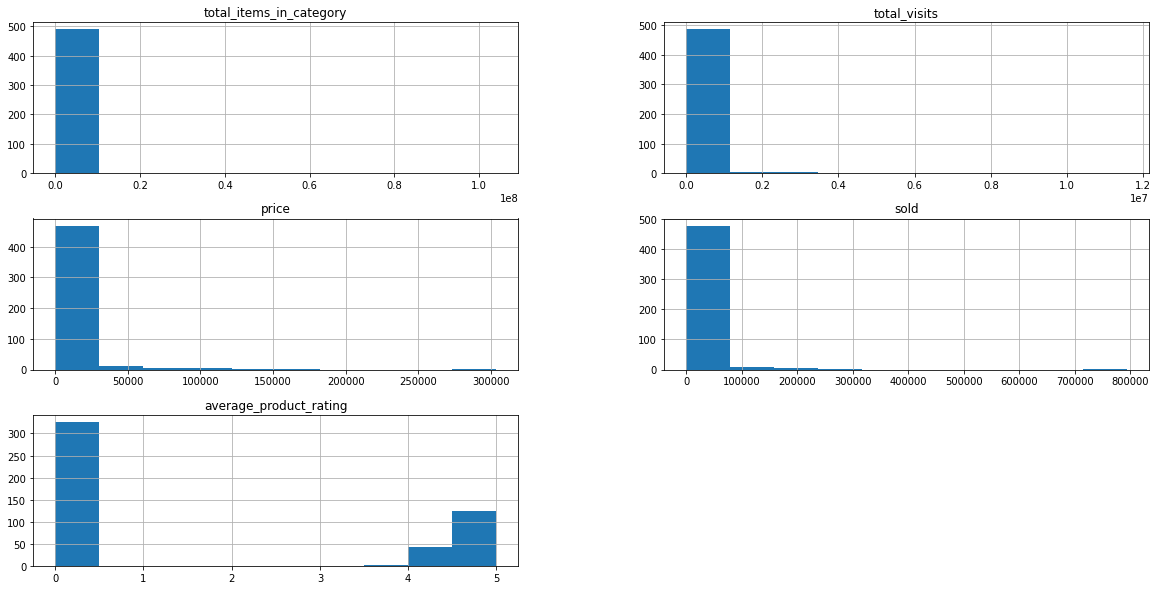

In [361]:
df.hist(figsize=(20, 10))

In [384]:
df['price'].sort_values(ascending=False)

141    303800.0
154    279900.0
139    179900.0
138    169900.0
148    167998.0
         ...   
220         0.0
219         0.0
218         0.0
217         0.0
247         0.0
Name: price, Length: 494, dtype: float64

In [385]:
df.iloc[141]

category                                                        Herramientas
total_items_in_category                                              1350391
best_seller_product        Hidrolavadora Black+Decker PW1450TD naranja/ne...
total_visits                                                             0.0
price                                                               303800.0
currency                                                                 COP
sold                                                                  1716.0
creation_date                                           2021-09-29T20:59:21Z
country                                                             Colombia
state                                                            Bogotá D.C.
brand                                                           Black+Decker
average_product_rating                                                   4.7
seller_id                                                          205607103

In [367]:
df['category'].unique()

array(['Accesorios para Vehículos', 'Arte y Antigüedades',
       'Autos, Motos y Otros', 'Cámaras Digitales y Foto',
       'Celulares y Teléfonos', 'Coleccionables y Hobbies', 'Computación',
       'Consolas y Videojuegos', 'Deportes y Fitness',
       'Electrónica, Audio y Video', 'Hogar y Electrodomésticos',
       'Indumentaria y Accesorios', 'Inmuebles', 'Instrumentos Musicales',
       'Joyas y Relojes', 'Juegos y Juguetes',
       'Libros, Revistas y Comics', 'Música y Películas', 'Servicios',
       'Otras categorías', 'Acessórios para Veículos', 'Agro',
       'Alimentos e Bebidas', 'Animais', 'Antiguidades e Coleções',
       'Arte, Papelaria e Armarinho', 'Bebês', 'Beleza e Cuidado Pessoal',
       'Brinquedos e Hobbies', 'Calçados, Roupas e Bolsas',
       'Câmeras e Acessórios', 'Carros, Motos e Outros',
       'Casa, Móveis e Decoração', 'Celulares e Telefones', 'Construção',
       'Eletrodomésticos', 'Eletrônicos, Áudio e Vídeo',
       'Esportes e Fitness', 'Ferrament

In [369]:
df['currency'].unique()

array(['not found', 'BRL', 'COP', 'ARS', 'CLP', 'PEN', 'MXN', 'UYU',
       'USD'], dtype=object)

In [370]:
df['country'].unique()

array(['Cuba', 'Brasil', 'Ecuador', 'Paraguay', 'El Salvador', 'Colombia',
       'Argentina', 'Guatemala', 'Bolivia', 'Costa Rica', 'Venezuela',
       'Dominicana', 'Nicaragua', 'Panamá', 'Honduras', 'Chile', 'Perú',
       'Mexico', 'Uruguay'], dtype=object)

In [371]:
df['state'].unique()

array(['not found', 'Santa Catarina', 'São Paulo', 'Minas Gerais',
       'Paraná', 'Rio de Janeiro', 'Bogotá D.C.', 'Boyaca',
       'Cundinamarca', 'Valle Del Cauca', 'Antioquia', 'Santander',
       'Risaralda', 'Buenos Aires', 'Santa Fe', 'Capital Federal',
       'Córdoba', 'RM (Metropolitana)', 'Valparaíso', 'Maule',
       'Lima Metropolitana', 'La Libertad', 'Estado De México', 'Sinaloa',
       'Distrito Federal', 'Jalisco', 'Sonora', 'Michoacán', 'Nuevo León',
       'Oaxaca', 'Montevideo', 'Canelones'], dtype=object)

In [396]:
def datetime(column):
    if column != 'not found':
        column = pd.to_datetime(column, infer_datetime_format=True)
        column = column.strftime("%d-%m-%Y")
        return str(column)
        

In [400]:
df['creation_date'] = df['creation_date'].apply(datetime)

In [401]:
df['creation_date'] = df['creation_date'].fillna('00-00-0000')

In [403]:
df

,category,total_items_in_category,best_seller_product,total_visits,price,currency,sold,creation_date,country,state,brand,average_product_rating,seller_id
0,Accesorios para Vehículos,0,not found,0.0,0.0,not found,0.0,00-00-0000,Cuba,not found,not found,0.0,not found
1,Arte y Antigüedades,0,not found,0.0,0.0,not found,0.0,00-00-0000,Cuba,not found,not found,0.0,not found
2,"Autos, Motos y Otros",0,not found,0.0,0.0,not found,0.0,00-00-0000,Cuba,not found,not found,0.0,not found
3,Cámaras Digitales y Foto,0,not found,0.0,0.0,not found,0.0,00-00-0000,Cuba,not found,not found,0.0,not found
4,Celulares y Teléfonos,0,not found,0.0,0.0,not found,0.0,00-00-0000,Cuba,not found,not found,0.0,not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,"Ropa, Calzados y Accesorios",217685,Remera Stranger Things Hellfire Club,7732.0,490.0,UYU,500.0,31-05-2022,Uruguay,Montevideo,Maldito Ramon,4.9,124773885
490,Salud y Equipamiento Médico,33460,Masajeador Electrico Like Cuerpo Espalda Cuell...,86157.0,939.0,UYU,250.0,06-07-2020,Uruguay,Montevideo,"Cervical,Pies,Todo el cuerpo,cuello,cervicales",4.6,97669372
491,Servicios,5223,not found,0.0,0.0,not found,0.0,00-00-0000,Uruguay,not found,not found,0.0,not found
492,"Souvenirs, Cotillón y Fiestas",57923,Máquina Inflador 600w 2iny + Pack X100 Globos ...,72690.0,990.0,UYU,500.0,24-04-2018,Uruguay,Montevideo,by El Rey,4.7,83198226


In [405]:
df.to_csv('ml_dataframe_clean.csv')